In [533]:
import numpy as np
import itertools
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [699]:
l = []
for x in itertools.product([1,0],repeat=10):
    l.append(np.array(x))

In [700]:
def calculate_xor(inputs):
    inputs = inputs.T
    L2 = []
    targets = []
    for i in range(0, len(inputs), 2):
        L2.append((inputs[i], inputs[i+1]))

    for i in range(len(L2)):
        targets.append(L2[i][0] ^ L2[i][1])

    return np.array(targets).T

In [539]:
x = np.array([1,1,1,0,1,0,1,0]).reshape(1,8)

w1 = np.random.rand(8,8) 
w2 = np.random.rand(8,4) 
y = calculate_xor(x)

print(x,y)

[[1 1 1 0 1 0 1 0]] [[0 1 1 1]]


In [540]:
print(x.shape,w1.shape, w2.shape, y.shape)

(1, 8) (8, 8) (8, 4) (1, 4)


In [772]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,input)
    a2 = np.squeeze(a2)
    return a2.tolist()


# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x.T)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2.T,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 =  a2 - y.T 
    dw2 = np.dot(dz2,a1.T)/m
    dw2 = dw2.T
    dz1 = np.dot(w2,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x)/m   
    return dz2,dw2,dz1,dw1

In [704]:
# z1,a1,z2,a2 =forward_prop(w1,w2,x) # Done works
# dz2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)

65113
[[0 0 1 0 0 1 0 1 1 1]]
[0.46823048843636994, 0.9783796368138771, 0.9943001100811297, 0.9859712197725745, 0.6995104512860166]
[[0 1 1 1 0]]
[0.4746209911873519, 0.9812557238411176, 0.9955150002737295, 0.9877164944063461, 0.7142583514235011]
[1 1 1 0 1]


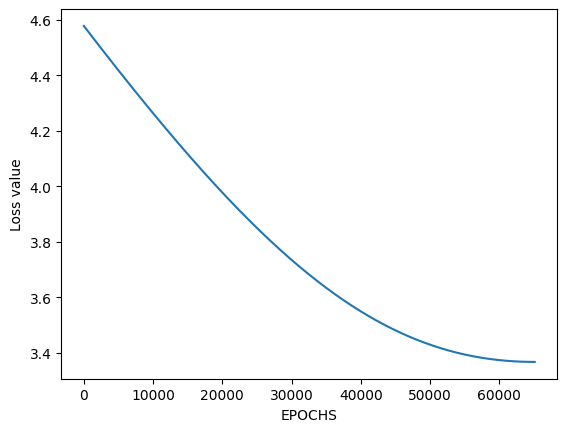

In [785]:
import random

input_nodes = 10
hidden_nodes = 10
output_nodes = 5

l = []
for x in itertools.product([1,0],repeat=input_nodes):
    l.append(np.array(x))

x = l[random.randint(0,len(l)-1)].reshape(1,input_nodes)

w1 = np.random.rand(input_nodes,hidden_nodes) 
w2 = np.random.rand(hidden_nodes,output_nodes) 
y = calculate_xor(x)

losses = []


# x = l[random.randint(0,len(l)-1)].reshape(1,8)
# y = calculate_xor(x)

last_loss = 1000 
iterations = 100000
for i in range(iterations):

    lr = 0.0001

    # print(lr)

    m = x.shape[1]
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)

    if loss < last_loss:
        last_loss = loss
    else:
        print(i)
        break
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

print(x)
out = predict(w1,w2,x)
print(out)
print(calculate_xor(x))

out2 = predict(w1,w2,l[401])
print(out2)
print(calculate_xor(l[401]))

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [780]:
out2 = predict(w1,w2,l[401])

In [781]:
out2

[0.993300917915899,
 0.9873401797517811,
 0.5052586956663465,
 0.267506302186766,
 0.49898070155831287]

In [782]:
print(np.around(out2))

[1. 1. 1. 0. 0.]
